# Explore here

PROYECTO SERIES DE TIEMPO

In [4]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from pmdarima import auto_arima

import warnings

In [5]:
warnings.filterwarnings("ignore")

In [6]:
archivo = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [ ]:
# Nombre y ruta de la carpeta para datos en crudo
data_folder = "/workspaces/Proyecto_serie_temp_1/data/raw"
data_path = os.path.join(data_folder, "sales.csv")

# Crear la carpeta si no existe
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Petición para descargar el fichero
response = requests.get(archivo)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Guardar el contenido en la carpeta en crudo
    with open(data_path, 'wb') as file:
        file.write(response.content)
    print("Archivo guardado en crudo exitosamente en:", data_path)
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el archivo CSV descargado 
df = pd.read_csv(data_path)

Archivo guardado en crudo exitosamente en: /workspaces/Proyecto_serie_temp_1/data/raw/sales.csv


In [8]:
df.head(50)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
5,2022-09-08 17:10:08.079328,60.081865
6,2022-09-09 17:10:08.079328,68.466704
7,2022-09-10 17:10:08.079328,67.765106
8,2022-09-11 17:10:08.079328,70.512261
9,2022-09-12 17:10:08.079328,74.656453


In [9]:
df.shape

(366, 2)

In [10]:
ts = df["sales"]
ts.head()

0    55.292157
1    53.803211
2    58.141693
3    64.530899
4    66.013633
Name: sales, dtype: float64

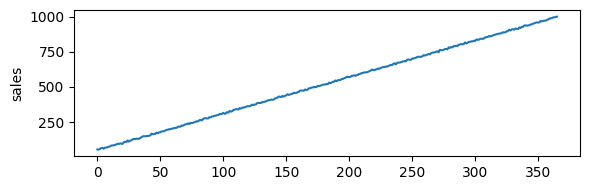

In [11]:
fig, axis = plt.subplots(figsize = (6, 2))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

¿Cuál es el tensor de la serie temporal?
Diaria
¿Cuál es la tendencia?
Postivia ascendente
¿Es estacionaria?
No lo parece
¿Existe variabilidad o presencia de ruido?


In [12]:
decomposition = seasonal_decompose(ts, period = 30)
decomposition

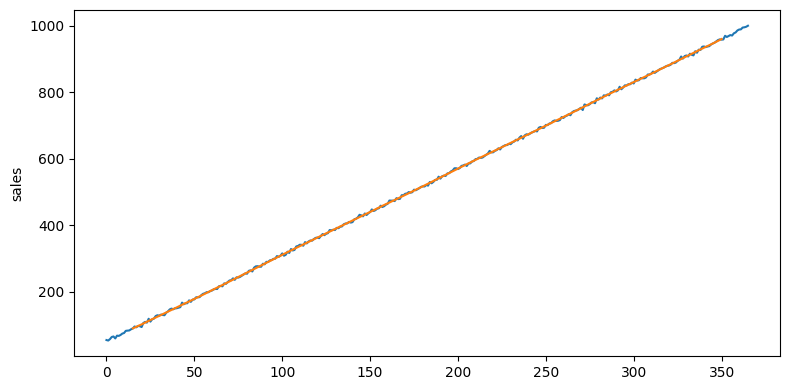

In [13]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

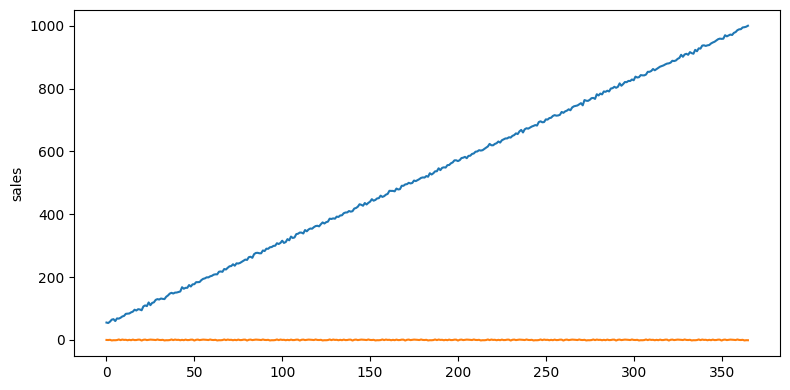

In [14]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) # Representa el número de ventas diarias
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [15]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [16]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

No es estacionaria, p-value >0.05

In [17]:
#Establecemos la columna date como índice
sales_dif = df
sales_dif = sales_dif.set_index("date")

# Diferenciar la serie para remover tendencia
sales_dif['dif_sales'] = sales_dif['sales'].diff().dropna()

ts_sales_dif = sales_dif["dif_sales"]
ts_sales_dif.dropna(inplace = True)

ts_sales_dif



date
2022-09-04 17:10:08.079328   -1.488946
2022-09-05 17:10:08.079328    4.338482
2022-09-06 17:10:08.079328    6.389205
2022-09-07 17:10:08.079328    1.482734
2022-09-08 17:10:08.079328   -5.931768
                                ...   
2023-08-30 17:10:08.079328    0.518681
2023-08-31 17:10:08.079328    5.386972
2023-09-01 17:10:08.079328    0.827090
2023-09-02 17:10:08.079328    1.535798
2023-09-03 17:10:08.079328    3.132571
Name: dif_sales, Length: 365, dtype: float64

In [18]:
# Test de Dickey-Fuller en la serie diferenciada
test_stationarity(ts_sales_dif)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

Ya es estacionaria!

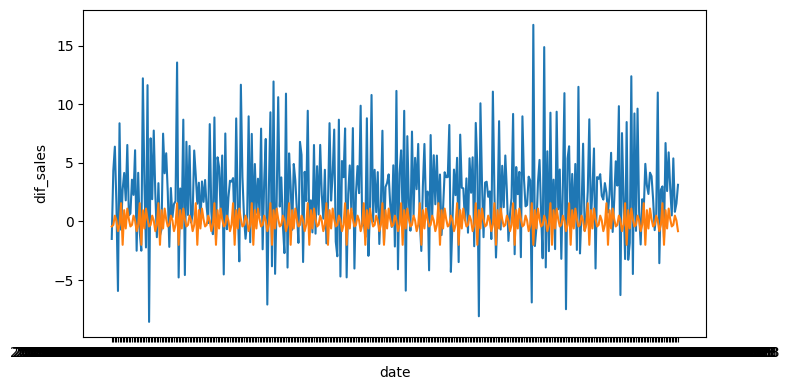

In [19]:
sales_dif_decomposition = seasonal_decompose(ts_sales_dif, period = 12)

sales_dif_seasonal = sales_dif_decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_sales_dif)
sns.lineplot(data = sales_dif_seasonal)

plt.tight_layout()

plt.show()

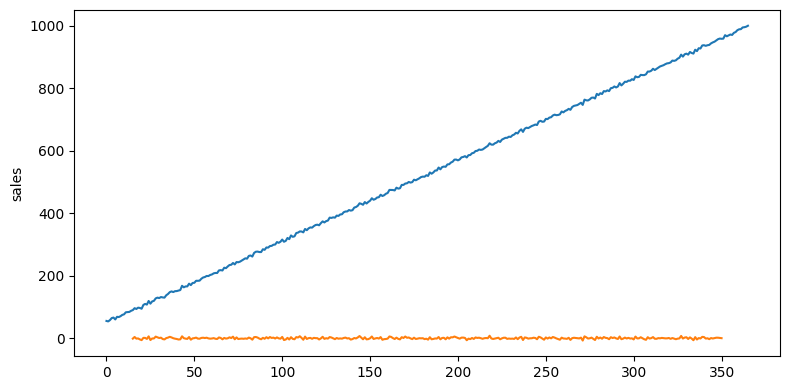

In [20]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) # Representa el número de ventas diarias
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

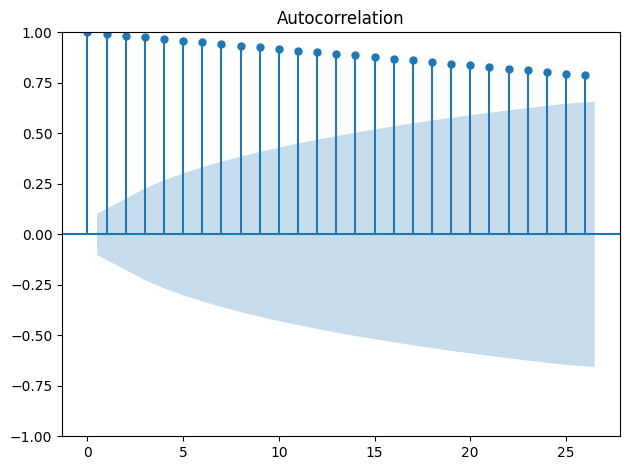

In [21]:
# cada lag es un mes
plot_acf(ts)

plt.tight_layout()

plt.show()

In [23]:
model = auto_arima(ts, seasonal = False, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.184, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.729 seconds


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Thu, 19 Dec 2024   AIC                           1839.552
Time:                        20:34:03   BIC                           1855.152
Sample:                             0   HQIC                          1845.752
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
forecast = model.predict(30)
forecast

366    1002.158148
367    1004.831669
368    1007.423289
369    1010.021630
370    1012.619419
371    1015.217254
372    1017.815084
373    1020.412915
374    1023.010746
375    1025.608577
376    1028.206408
377    1030.804240
378    1033.402071
379    1035.999902
380    1038.597733
381    1041.195564
382    1043.793395
383    1046.391226
384    1048.989057
385    1051.586888
386    1054.184719
387    1056.782550
388    1059.380381
389    1061.978212
390    1064.576043
391    1067.173874
392    1069.771705
393    1072.369536
394    1074.967367
395    1077.565198
dtype: float64

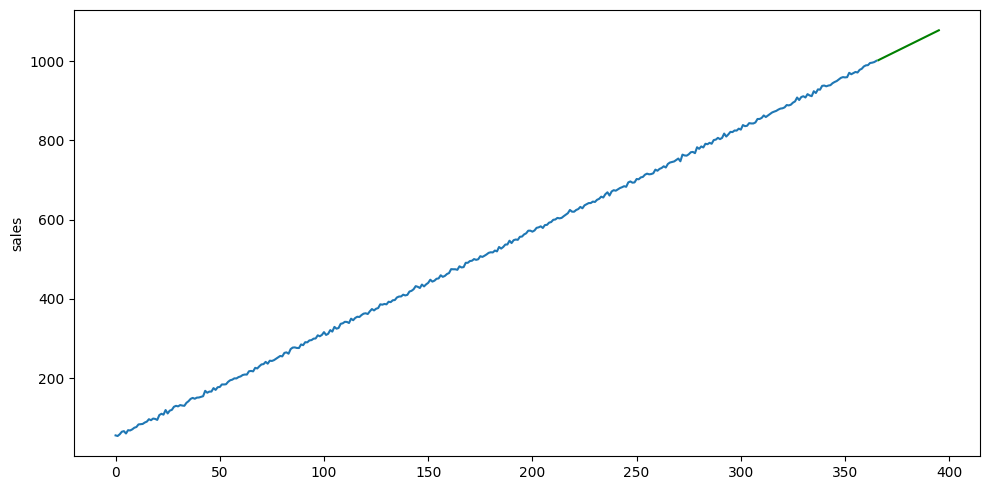

In [28]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()